In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/HRDataset_v14.csv')
data.head()


,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


# Pandas Question

1. What is the minimum, median, max, and average salary for employee by Married Description and Gender.
Hints: use agg function<br>
Expected Output as below<br>
(5 Points)

In [3]:
import pandas as pd

# Membaca data
data = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/HRDataset_v14.csv')

# Group by MaritalDesc dan Sex, lalu aggregate the salary statistics
salary_stats = data.groupby(['MaritalDesc', 'Sex'])['Salary'].agg(['min', 'median', 'max', 'mean']).reset_index()

# Mengubah nama kolom
salary_stats.columns = ['MaritalDesc', 'Sex', 'min_salary', 'median_salary', 'max_salary', 'average_salary']

# Mengatur MaritalDesc dan Sex sebagai index
salary_stats.set_index(['MaritalDesc', 'Sex'], inplace=True)

# Menampilkan hasil
print(salary_stats)



                 min_salary  median_salary  max_salary  average_salary
MaritalDesc Sex                                                       
Divorced    F         45069        59393.0       68182    57345.500000
            M         45115        63738.5      148999    72520.857143
Married     F         45433        62662.0      250000    69638.986111
            M         46120        63370.5      157000    70089.038462
Separated   F         52984        60627.0       66149    60658.888889
            M         64397        70468.0       74417    69760.666667
Single      F         45395        62068.0      220450    68988.266667
            M         46428        63055.5      178000    71340.048387
Widowed     F         45046        63303.5      107226    69719.750000
            M         52788        61359.0       67176    60670.500000


2. What is top-5 reason of termination?<br>
Expected Output as below<br>
(5 Points)

In [4]:
import pandas as pd

# Membaca data
data = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/HRDataset_v14.csv')

# Menghtiung beberapa reason of termination
termination_counts = data['TermReason'].value_counts()

# Mengambil top 5 termination reasons
top_5_termination = termination_counts.head(5)

# Menampilkan top 5 termination reasons
print(top_5_termination)


N/A-StillEmployed    207
Another position      20
unhappy               14
more money            11
career change          9
Name: TermReason, dtype: int64


3. What is the highest number of employee by Recruitment Source that 'Exceeds' the Performance Score?
Hints: Use filter for Performance Score first. Don't forget to sort_values.<br>
Expected Output as below<br>
(5 Points)

In [5]:
import pandas as pd

high_performers = data[data['PerformanceScore'] == 'Exceeds']
employee_count_by_source = high_performers['RecruitmentSource'].value_counts().reset_index()
employee_count_by_source.columns = ['Recruitment Source', 'Employee Count']
employee_count_by_source = employee_count_by_source.sort_values(by='Employee Count', ascending=False)
print(employee_count_by_source)



   Recruitment Source  Employee Count
0              Indeed              12
1            LinkedIn               9
2  Diversity Job Fair               6
3   Employee Referral               5
4       CareerBuilder               2
5       Google Search               2
6             Website               1


4. How many managers in each department?
Hints: use nunique() as aggregation function.<br>
Expected Output as below.<br>
(5 Points)

In [6]:
import pandas as pd

# Membaca data
data = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/HRDataset_v14.csv')

# Group by Department dan count the number of unique managers
managers_per_department = data.groupby('Department')['ManagerID'].nunique()

# Menampilkan
print(managers_per_department)


Department
Admin Offices            4
Executive Office         1
IT/IS                    6
Production              11
Sales                    4
Software Engineering     3
Name: ManagerID, dtype: int64


5. What is Termination Ratio by Gender?.
Hints: use value_counts(normalize=True).<br>
Expected Output as below.<br>
(5 Points)

In [7]:
import pandas as pd

# Membaca data
data = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/HRDataset_v14.csv')

# Termination Ratio by Gender
termination_ratio_gender = data[data['EmploymentStatus'] == 'Voluntarily Terminated']['Sex'].value_counts(normalize=True)

# Menampilkan hasil
print("Termination Ratio by Gender:")
print(termination_ratio_gender)


Termination Ratio by Gender:
F     0.579545
M     0.420455
Name: Sex, dtype: float64


# Create an EDA and Data Visualization Question

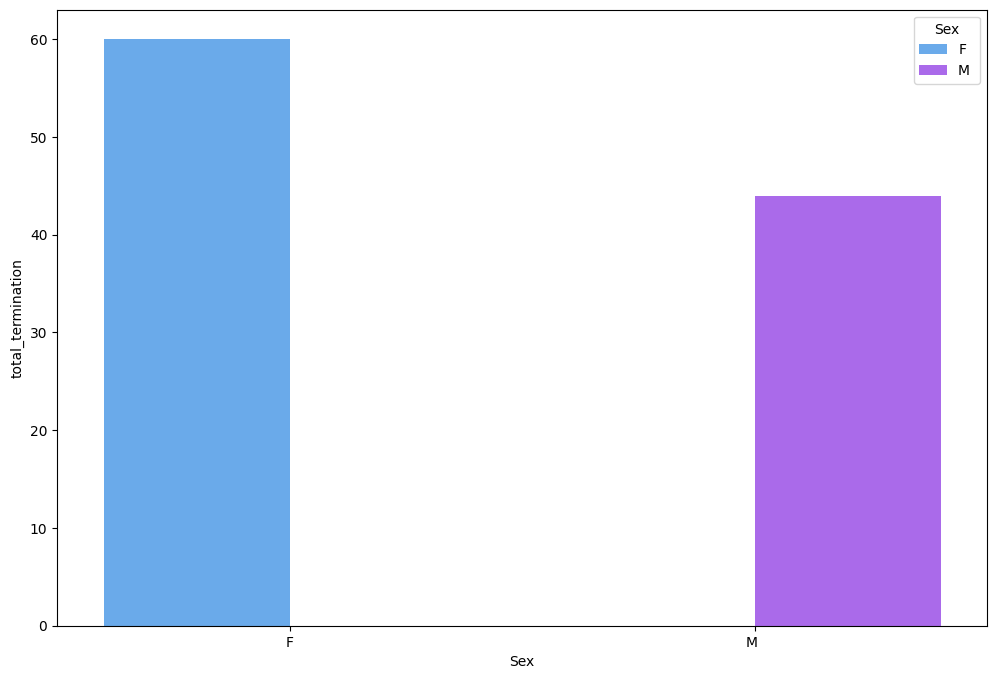

In [8]:
#Sample Visualization, the example is not counted for the final score :p
#Create 5 visualization for better understanding on data
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

term = data.groupby(by=['Sex'])\
                        .agg(total_termination=('Termd','sum')).reset_index()\

f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='Sex', y='total_termination', hue='Sex', data=term, palette='cool')

6. Buatlah Scatter plot antara kolom "Salary" dengan "EngagementSurvey", beri warna berbeda sesuai dengan status di "Termd"<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


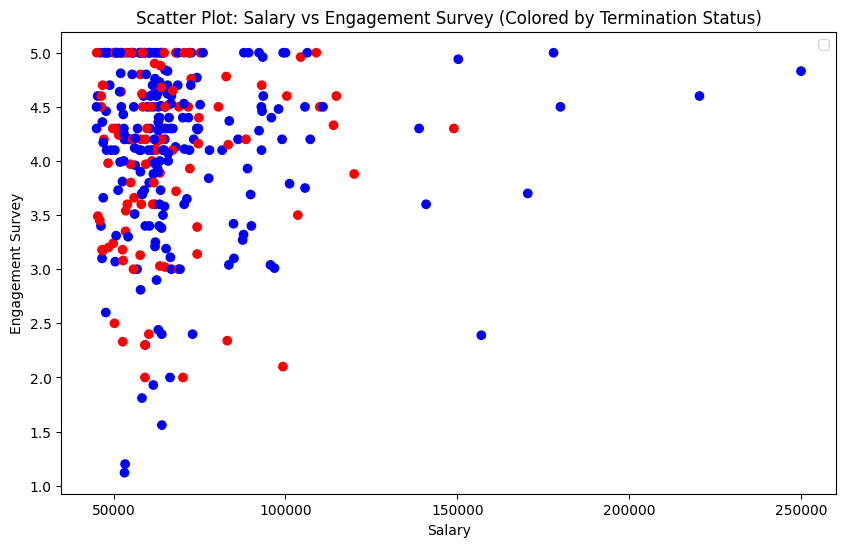

In [9]:
from matplotlib import pyplot as plt
import seaborn as sns

# Mendefinisikan warna untuk termination status
colors = {'0': 'blue', '1': 'red'}

# Membuat scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data['Salary'], data['EngagementSurvey'], c=data['Termd'].astype(str).map(colors))

# Menambah legend
plt.legend(handles=scatter.legend_elements()[0], labels=['Not Terminated', 'Terminated'])

# mengatur label dan judul
plt.xlabel('Salary')
plt.ylabel('Engagement Survey')
plt.title('Scatter Plot: Salary vs Engagement Survey (Colored by Termination Status)')

# Menampilkan plot
plt.show()


7. Buatlah visualisasi barchart untuk menghitung jumlah "termination of an employee's" berdasarkan department.<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

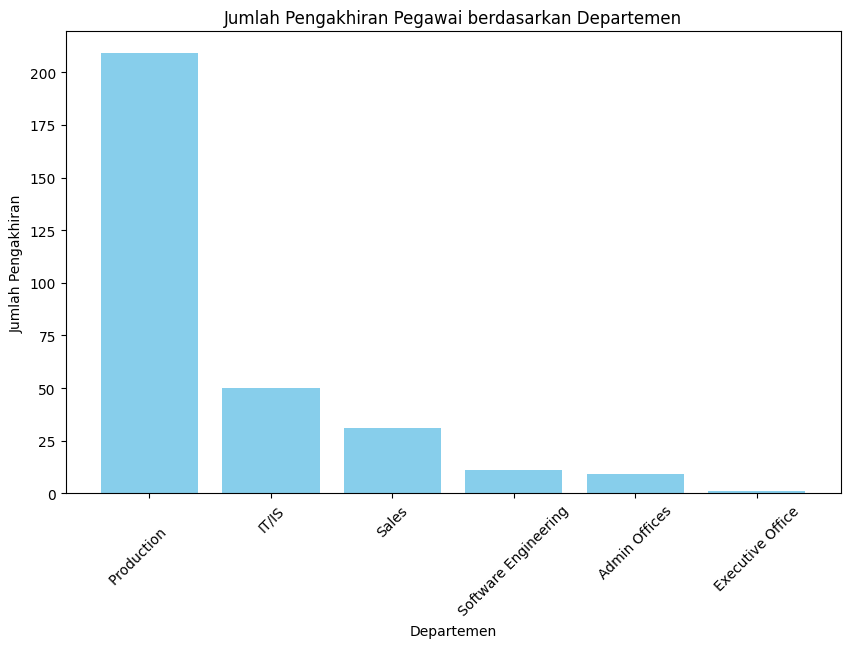

In [10]:
import matplotlib.pyplot as plt

# Hitung jumlah pengakhiran pegawai berdasarkan departemen
termination_counts = data['Department'].value_counts()

# Buat bar chart
plt.figure(figsize=(10, 6))
plt.bar(termination_counts.index, termination_counts.values, color='skyblue')

# Tambahkan judul dan label sumbu
plt.title('Jumlah Pengakhiran Pegawai berdasarkan Departemen')
plt.xlabel('Departemen')
plt.ylabel('Jumlah Pengakhiran')

# Rotasi label sumbu x agar lebih terbaca
plt.xticks(rotation=45)

# Tampilkan plot
plt.show()


8. Buatlah visualisasi Pie Chart untuk melihat persentasi jumlah karyawan yang "terminated" berdasarkan kolom "Position".<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

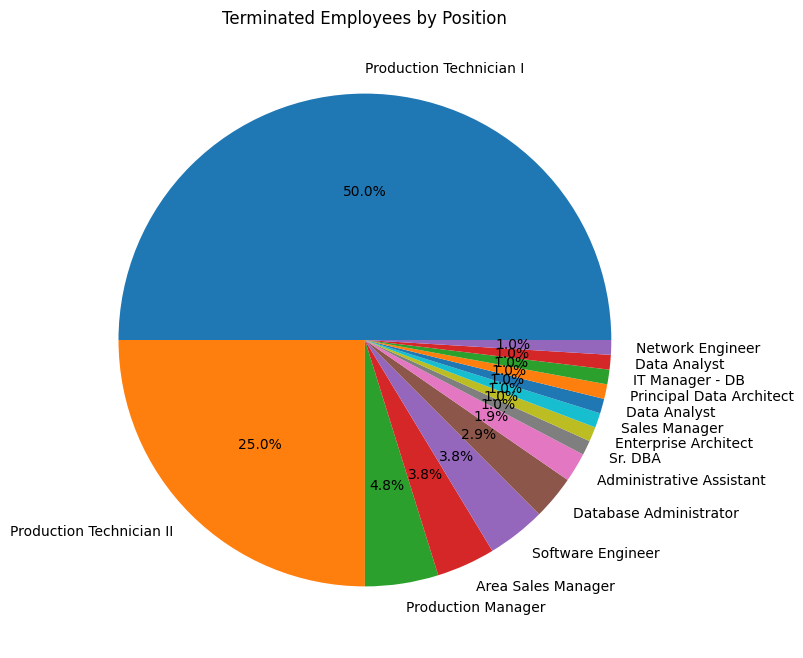

In [11]:
plt.figure(figsize=(8, 8))
data[data['Termd'] == 1]['Position'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.title('Terminated Employees by Position')
plt.show()


9. Buat Boxplot yang menggambarkan Salary berdasarkan Marital Desc, bedakan berdasarkan Termd
(5 points)

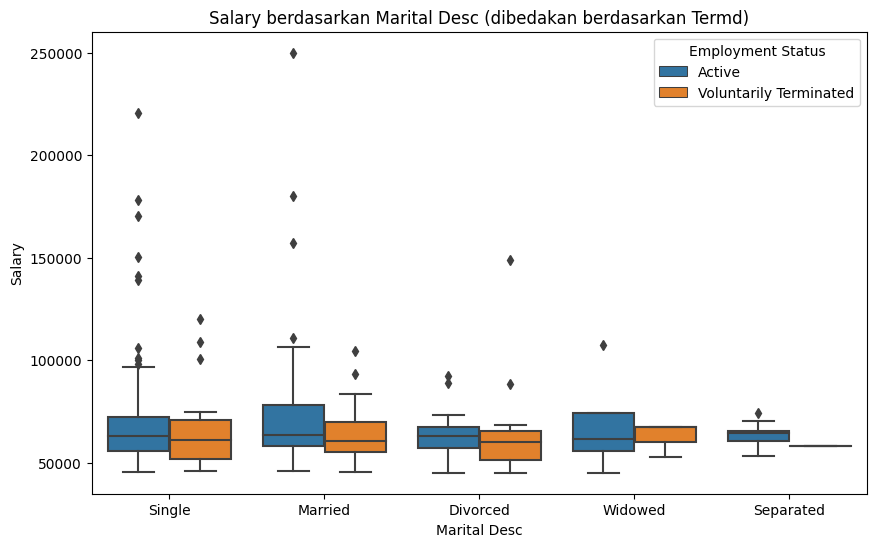

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data hanya untuk karyawan yang telah berhenti (Termd) atau masih aktif (Active)
filtered_data = data[data['EmploymentStatus'].isin(['Voluntarily Terminated', 'Active'])]

# Membuat boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='MaritalDesc', y='Salary', hue='EmploymentStatus', data=filtered_data)

# Menambahkan judul dan label sumbu
plt.title('Salary berdasarkan Marital Desc (dibedakan berdasarkan Termd)')
plt.xlabel('Marital Desc')
plt.ylabel('Salary')

# Menampilkan legenda
plt.legend(title='Employment Status')

# Menampilkan boxplot
plt.show()


10. Tampilkan pairplot antara kolom 'Salary', 'EngagementSurvey', 'EmpSatisfaction','Absences'
beri kategori warna berdasarkan 'Termd'<br>
(5points)

Pairplot


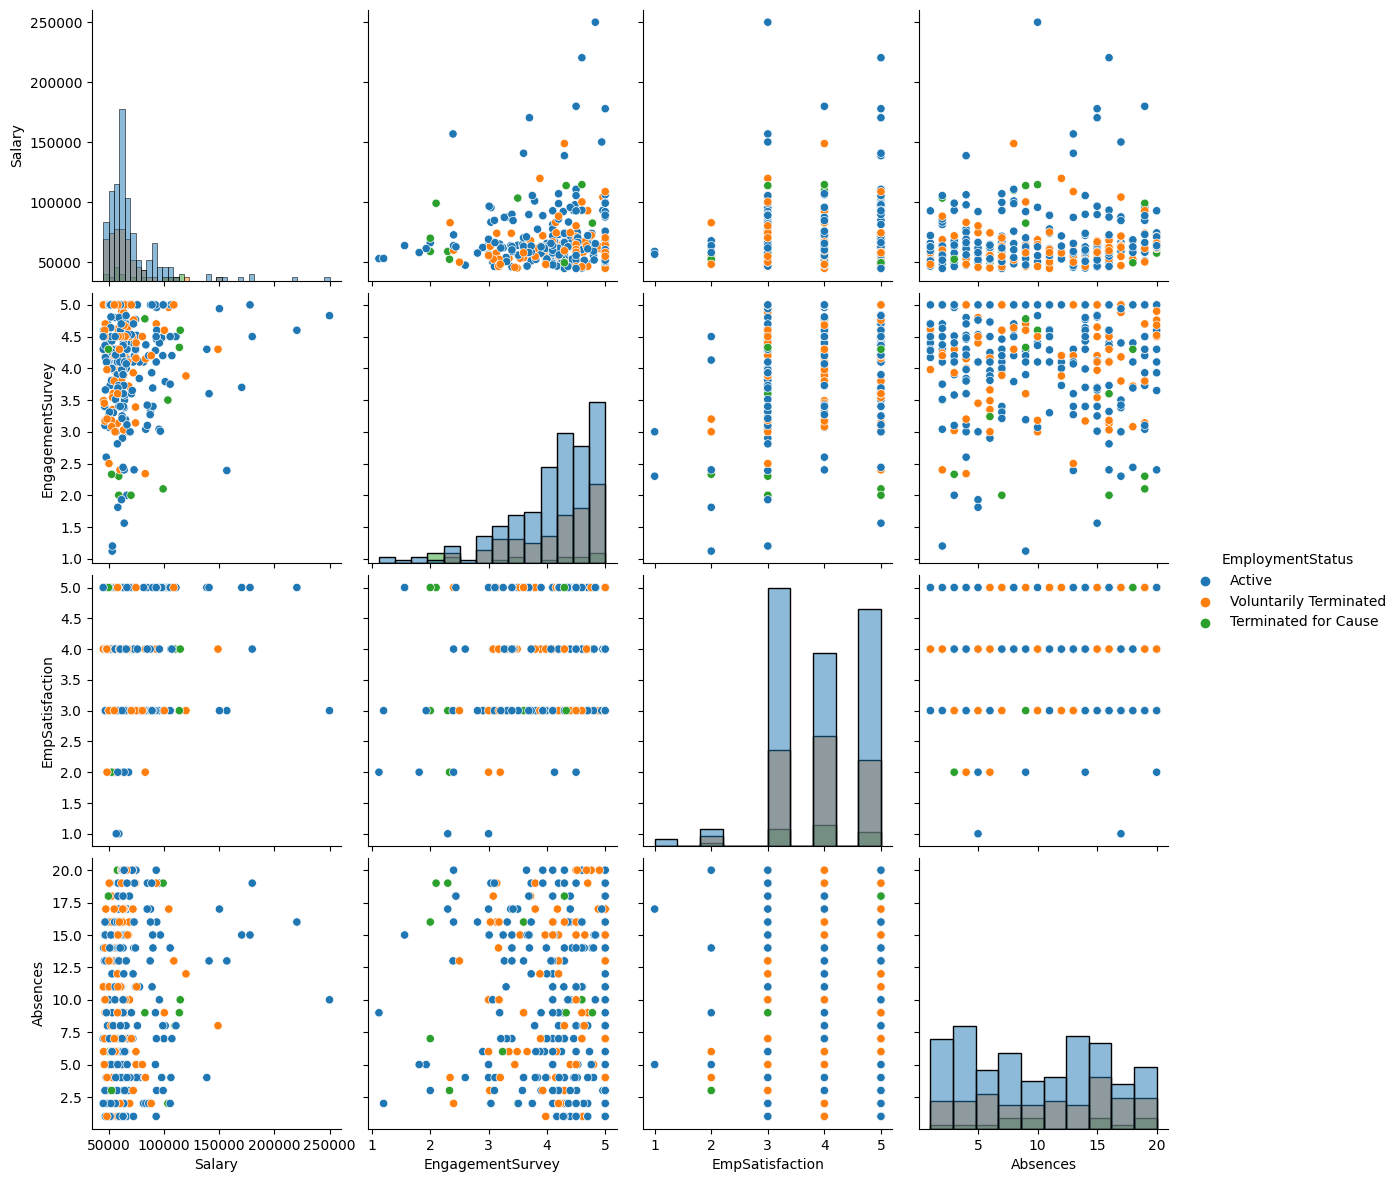

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tampilkan pairplot
print('Pairplot')
sns.pairplot(data=data[['Salary', 'EngagementSurvey', 'EmpSatisfaction','Absences', 'EmploymentStatus']], hue='EmploymentStatus', height=3, diag_kind="hist")
plt.show()


# Create Machine Learning Model to Predict Termd and Question

In [14]:
#11. Buat fitur baru (kolom baru) berupa "Age" dalam satuan tahun. Untuk mendapatkannya, ambil data pada kolom DOB dikurangi dengan 2022
#(5 points)
import pandas as pd

# Menghitung usia dan menambahkannya sebagai kolom baru
data['DOB'] = pd.to_datetime(data['DOB'])  # Pastikan kolom 'DOB' dalam tipe data datetime
data['Age'] = 2022 - data['DOB'].dt.year

# Memeriksa hasil
print(data.loc[:310, ['Employee_Name', 'DOB', 'Age']])




                Employee_Name        DOB  Age
0         Adinolfi, Wilson  K 1983-07-10   39
1    Ait Sidi, Karthikeyan    1975-05-05   47
2           Akinkuolie, Sarah 1988-09-19   34
3                Alagbe,Trina 1988-09-27   34
4            Anderson, Carol  1989-09-08   33
..                        ...        ...  ...
306            Woodson, Jason 1985-05-11   37
307        Ybarra, Catherine  1982-05-04   40
308          Zamora, Jennifer 1979-08-30   43
309               Zhou, Julia 1979-02-24   43
310             Zima, Colleen 1978-08-17   44

[311 rows x 3 columns]


In [15]:
#12. Lakukan MinMaxScaler dari fitur "Salary"
# (5 points)
from sklearn.preprocessing import MinMaxScaler

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Ambil data hingga baris ke-310
data_subset = data.loc[:309, ['Salary']]

# Lakukan scaling pada data Salary
scaled_salary = scaler.fit_transform(data_subset)

# Tambahkan hasil scaling ke dataframe
data.loc[:309, 'Salary_minmax'] = scaled_salary

# Tampilkan hasil scaling
print(data[['Salary', 'Salary_minmax']].head(310))



     Salary  Salary_minmax
0     62506       0.085087
1    104437       0.289698
2     64955       0.097038
3     64991       0.097213
4     50825       0.028088
..      ...            ...
305   60446       0.075035
306   65893       0.101615
307   48513       0.016806
308  220450       0.855805
309   89292       0.215795

[310 rows x 2 columns]


In [16]:
#13. Ubahlah semua tipe data object menjadi category
# 5 point
# List kolom-kolom yang perlu diubah tipe datanya
kolom_object = ['Employee_Name', 'Position', 'State', 'Sex', 'MaritalDesc', 'CitizenDesc',
                'HispanicLatino', 'RaceDesc', 'DateofHire', 'DateofTermination', 'TermReason',
                'EmploymentStatus', 'Department', 'ManagerName', 'RecruitmentSource', 'PerformanceScore']

# Ubah tipe data kolom-kolom tersebut menjadi category
data[kolom_object] = data[kolom_object].astype('category')

# Cek tipe data setelah perubahan
print(data.dtypes)



Employee_Name                       category
EmpID                                  int64
MarriedID                              int64
MaritalStatusID                        int64
GenderID                               int64
EmpStatusID                            int64
DeptID                                 int64
PerfScoreID                            int64
FromDiversityJobFairID                 int64
Salary                                 int64
Termd                                  int64
PositionID                             int64
Position                            category
State                               category
Zip                                    int64
DOB                           datetime64[ns]
Sex                                 category
MaritalDesc                         category
CitizenDesc                         category
HispanicLatino                      category
RaceDesc                            category
DateofHire                          category
DateofTerm

In [17]:
#Setelah diubah category

In [18]:
#14. Ubahlah "RecruitmentSource" dengan menggunakana Label Encoder
# 5 point

#15. Ubahlah "PerformanceScore" dengan menggunakana Label Encoder
# 5 point
from sklearn.preprocessing import LabelEncoder

# Inisialisasi Label Encoder
label_encoder = LabelEncoder()

# Menggunakan Label Encoder pada kolom "RecruitmentSource"
data['RecruitmentSource_encoded'] = label_encoder.fit_transform(data['RecruitmentSource'])

# Inisialisasi Label Encoder
label_encoder = LabelEncoder()

# Menggunakan Label Encoder pada kolom "RecruitmentSource"
data['RecruitmentSource_encoded'] = label_encoder.fit_transform(data['RecruitmentSource'])

# Tampilkan hasil
print(data[['RecruitmentSource', 'RecruitmentSource_encoded']].head())
print(data[['RecruitmentSource', 'RecruitmentSource_encoded']].head())



  RecruitmentSource  RecruitmentSource_encoded
0          LinkedIn                          5
1            Indeed                          4
2          LinkedIn                          5
3            Indeed                          4
4     Google Search                          3
  RecruitmentSource  RecruitmentSource_encoded
0          LinkedIn                          5
1            Indeed                          4
2          LinkedIn                          5
3            Indeed                          4
4     Google Search                          3


In [19]:
#16. Pisahkan dependent variable dan independent variable
# 5 point

#Dependent Varible (target)

#Independent Variable (feature)

import pandas as pd

# Baca data dari URL
url = 'https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/HRDataset_v14.csv'
data = pd.read_csv(url)

# Pisahkan dependent variable dan independent variables
X = data.drop(columns=['Termd'])  # Independent Variables
y = data['Termd']  # Dependent Variable

# Tampilkan 5 baris pertama dari setiap kelompok
print("Dependent Variable (Target):\n", y.head())
print("\nIndependent Variables (Features):\n", X.head())



Dependent Variable (Target):
 0    0
1    1
2    1
3    0
4    1
Name: Termd, dtype: int64

Independent Variables (Features):
               Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID  \
0       Adinolfi, Wilson  K  10026          0                0         1   
1  Ait Sidi, Karthikeyan     10084          1                1         1   
2         Akinkuolie, Sarah  10196          1                1         0   
3              Alagbe,Trina  10088          1                1         0   
4          Anderson, Carol   10069          0                2         0   

   EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  Salary  \
0            1       5            4                       0   62506   
1            5       3            3                       0  104437   
2            5       5            3                       0   64955   
3            1       5            3                       0   64991   
4            5       5            3                       0  

In [20]:
#17. Bagi data menjadi Train-Test sebesar 80:20
# (5 points)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_curve, roc_curve, precision_score, recall_score

# Memisahkan data menjadi train dan test (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan jumlah data dalam set pelatihan dan pengujian
print("Jumlah data dalam set pelatihan (train):", len(X_train))
print("Jumlah data dalam set pengujian (test):", len(X_test))


Jumlah data dalam set pelatihan (train): 248
Jumlah data dalam set pengujian (test): 63


In [21]:
#18. Lakukan pemodelan machine learning (metode klasifikasi bebas) untuk bisa memprediksi status "Termd". Lakukan evaluasi hasil dengan menampilkan
# score klasifikasi, precision dan recall.
# Gunakan model yang menurut kalian terbaik
# (5 points)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Load data
url = 'https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/HRDataset_v14.csv'
data = pd.read_csv(url)

# Ubah kolom bertipe objek menjadi kategori
data = data.astype('category')

# Ubah RecruitmentSource dan PerformanceScore menggunakan Label Encoder
from sklearn.preprocessing import LabelEncoder

le_recruitment = LabelEncoder()
data['RecruitmentSource'] = le_recruitment.fit_transform(data['RecruitmentSource'])

le_performance = LabelEncoder()
data['PerformanceScore'] = le_performance.fit_transform(data['PerformanceScore'])

# Pisahkan dependent variable (target) dan independent variables (features)
X = data[['MarriedID', 'MaritalStatusID', 'GenderID', 'DeptID', 'PerfScoreID', 'PositionID', 'RecruitmentSource',
          'PerformanceScore', 'Absences', 'SpecialProjectsCount', 'EmpSatisfaction', 'EngagementSurvey']]
y = data['Termd']

# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi dan latih model Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prediksi status "Termd" pada set pengujian
y_pred = model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Tampilkan hasil evaluasi
print(f'Accuracy  {accuracy*100:.2f}%')
print(f'Precision : {precision*100:.2f}%')
print(f'Recall : {recall*100:.2f}%')


Accuracy  66.67%
Precision : 53.85%
Recall : 31.82%


# Insight (Answering the Question)

19.	Is there any relationship between who a person works for (their manager) and their performance score? (5 points)<br>
20.	What are our best recruiting sources if we want to ensure a low ratio of termination? (5 points)<br>

In [22]:
#19. ada hubungan antara karyawan yang bekerja (manajer) dan skor kinerjanya dimana berdasarkan data diatas
#terdapat kemungkinan adanya hubungan sebab akibat antara manajer seorang karyawan dengan skor kinerjanya.
#Untuk mengetahui hubungan manajer dan skor kinerjanya salah satunya adalah dengan melihat dari tabel
#manajer per departemet dan perbandingan pengakhiran di setiap departement sebagai salah satu faktor
#yang menyebabkan pengahiran terjadi sehingga dapat terlihat adanya hubungan yang mungkin terjadi antara
#orang yang bekerja(manajernya) skor kinerjanya berdasarkan departemen dan manajer per departemen


#20. Untuk menentukan umber rekrutment terbaik yang terbaik jika ingin memastikan rasio pengakhiran rendah
#berdasarkan data yang ada dapat dilihat berdasarkan dari RecruitmentSource dan Term dimana dari tabel
#tersebut menunjukkan jika sumber Recruitment terbaik adalah dengan Indeed dengan alasan pengakhiran
#tertinggi karena masih bekerja. Namun dari 2 kolom tersebut tidak dapat menunjukkan dengan jelas sumber
#recuitment terbaik yang mampu menghasilkan rasio pengakhiran yang rendah sehingga diperlukan penghitungan
#rasio pengakhiran berdasarkan setiap kelompok yang mengakhiri kerja dimana sumber recruitment dengan
#rasio pengakhiran terendah inilih yang dianggap terbaik untuk meminimalkan adanya pengakhiran yang terjadi
#tetapi hal tersebut belum dipengaruhi oleh faktor faktor lain sebagai alasan dari pengahkiran.